# Index

***
### Import

### Data

    1. Read Data
    2. Summarize Statistical 
    3. Visualization of Categorical Data
### Preprocessing Data
    1. Missing data
    2. Label encoding
    3. Dummy data 
    4. Feature Importance
    5. Balanced Data
    6. Normalization
### Model
    1. Logistic Regression
    2. AdaBoost
    3. Gaussian Naive Bayes
    4. BernoulliNB
    5. KNN
    6. SVM
### Performance of all above model
***

# Import

In [1]:
import pandas as pd                                           # to read data in Dataframe
import numpy as np
import seaborn as sns                                         # for visualization 
import matplotlib.pyplot as plt                               # also for visualization
from sklearn.preprocessing import LabelEncoder                # to encode the data into labels
from sklearn.preprocessing import StandardScaler              # to normalization of data

from sklearn.model_selection import train_test_split          # split data into train and test
from sklearn.metrics import classification_report, accuracy_score   # to check the accuracy or summary of prediction

# used for create different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from collections import Counter                               # use to count the elements in columns
from imblearn.over_sampling import SMOTE                      # to balanced the data if imbalanced

# Data

## 1. Read Data

In [2]:
bank_df = pd.read_csv("C:/Users/Asus/Downloads/ML_Exam-1/bank.csv",sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Summarize Statistical 

In [3]:
# Shape of Dataframe
bank_df.shape

(41188, 21)

In [4]:
# Size of Data
bank_df.size

864948

In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Categorical Data

bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## 3. Visualization of Categorical Data

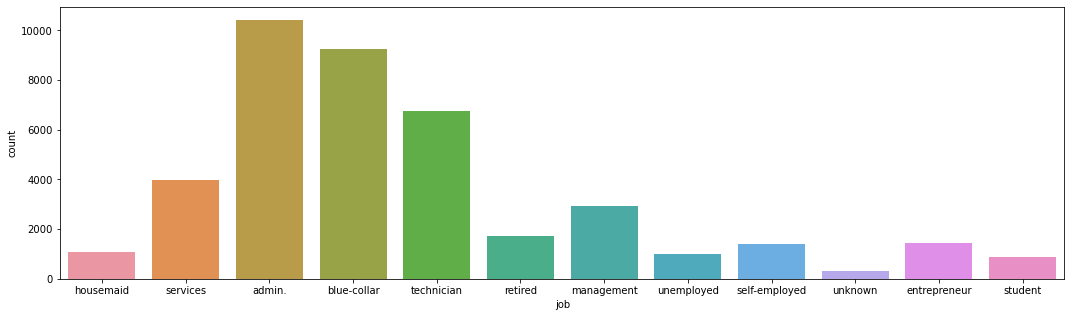

In [7]:
plt.figure(figsize=(18,5))
sns.countplot(x='job',data=bank_df)
plt.show()

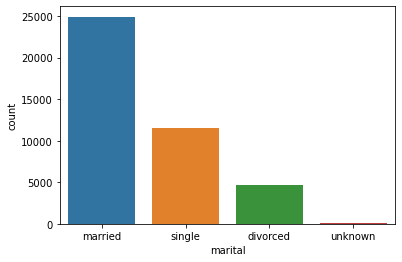

In [8]:
sns.countplot(x='marital',data=bank_df)
plt.show()

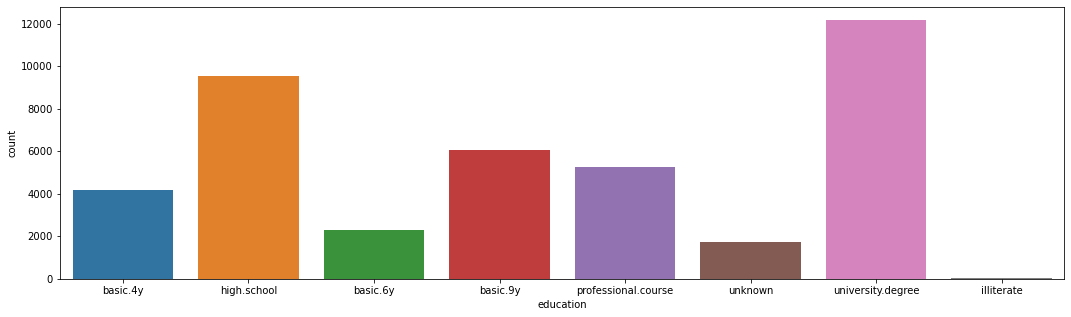

In [9]:
plt.figure(figsize=(18,5))
sns.countplot(x='education',data=bank_df)
plt.show()

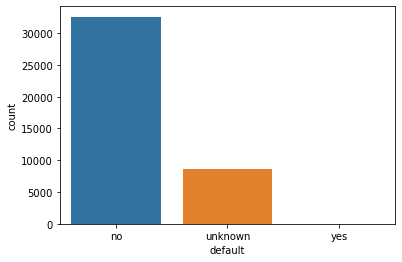

In [10]:
sns.countplot(x='default',data=bank_df)
plt.show()

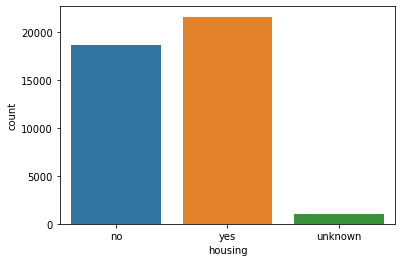

In [11]:
sns.countplot(x='housing',data=bank_df)
plt.show()

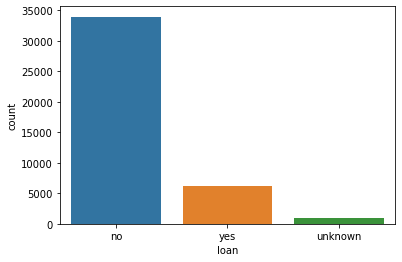

In [12]:
sns.countplot(x='loan',data=bank_df)
plt.show()

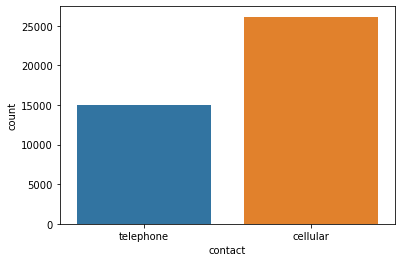

In [13]:
sns.countplot(x='contact',data=bank_df)
plt.show()

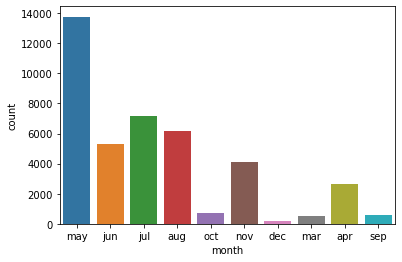

In [14]:
sns.countplot(x='month',data=bank_df)
plt.show()

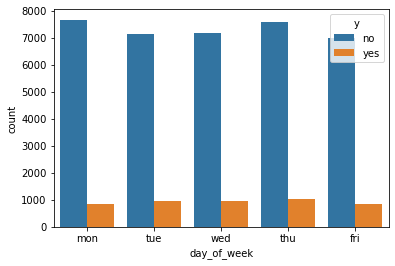

In [15]:
sns.countplot(x='day_of_week',data=bank_df, hue='y')
plt.show()

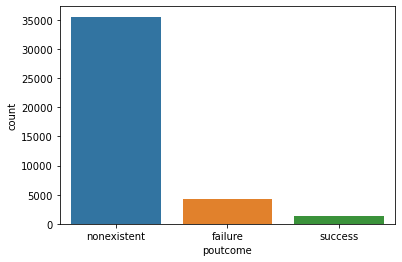

In [16]:
sns.countplot(x='poutcome',data=bank_df)
plt.show()

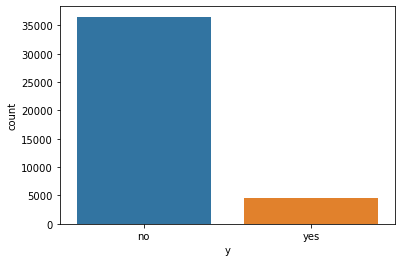

In [17]:
sns.countplot(x='y',data=bank_df)
plt.show()

EDA Done.............

# Preprocessing Data

## 1. Missing data

In [18]:
# Missing values
bank_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing values 


## 2. Label Encoding

In [19]:
# Label Encoding
le = LabelEncoder()

In [20]:
le.fit(bank_df['day_of_week'])
bank_df['day_of_week']=le.transform(bank_df['day_of_week'])

In [21]:
le.fit(bank_df['month'])
bank_df['month']=le.transform(bank_df['month'])

In [22]:
bank_df['y'] = bank_df['y'].apply(lambda x: 1 if (x == 'yes') else 0)

## 3. Dummy Data

In [23]:
master_df = pd.get_dummies(bank_df)

## 4. Feature Importance

In [24]:
# Selecting important features based on Random Forest
x = master_df.drop('y', axis= 1)
y = master_df['y']
# Split data into train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [25]:
# RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_true= y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10961
           1       0.65      0.51      0.57      1396

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



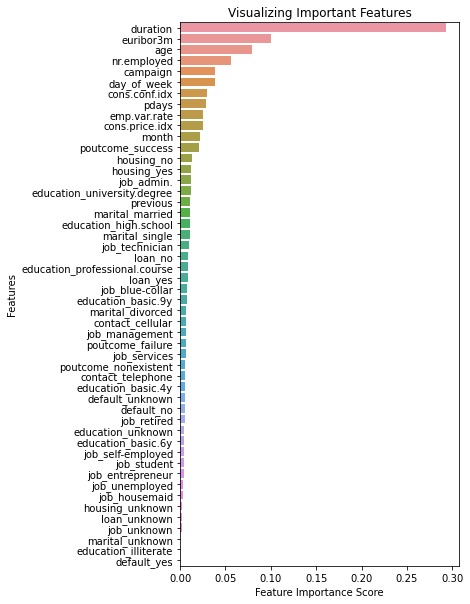

In [26]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(5,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

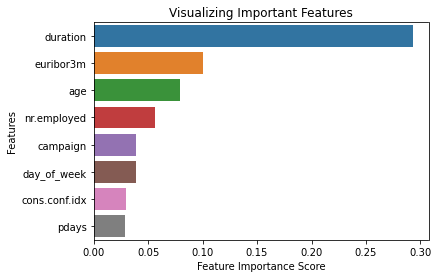

In [27]:
# Top 8 important features 
sns.barplot(x=feature_imp[:8], y=feature_imp.index[:8])

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## 5. Balanced Data

In [28]:
counter = Counter(y)
print(counter)
print("Data is imbalance")

# transform Data
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
counter = Counter(y)
print(counter)
print("Now Balanced")

Counter({0: 36548, 1: 4640})
Data is imbalance
Counter({0: 36548, 1: 36548})
Now Balanced


## 6. Normalization 

In [29]:
# Standardize the data using the anyone of the scalers provided by sklearn
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.38352862,  0.78758205, -0.66316861, ..., -0.27688808,
         0.58706086, -0.32776707],
       [ 1.47031349,  0.78758205, -0.66316861, ..., -0.27688808,
         0.58706086, -0.32776707],
       [-0.26538389,  0.78758205, -0.66316861, ..., -0.27688808,
         0.58706086, -0.32776707],
       ...,
       [ 1.20995888, -0.87934804, -1.43015339, ..., -0.27688808,
        -1.70340089, -0.32776707],
       [-1.22001745,  0.37084953, -1.43015339, ..., -0.27688808,
         0.58706086, -0.32776707],
       [-1.56715693,  0.78758205,  0.87080097, ..., -0.27688808,
        -1.70340089, -0.32776707]])

 Now Data is normalised

# Model

In [30]:
Model = []
Accuracy =[]

In [31]:
# train test split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

## 1. Logistic Regression

In [32]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10996
           1       0.97      0.92      0.94     10933

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
Model.append("Logistic Regression")
Accuracy.append(accuracy_score(y_test,y_pred))

Logistic Regression is good predictor with
Accuracy 95%

## 2. AdaBoost

In [34]:
ada_model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada_model.fit(x_train,y_train)
y_pred = ada_model.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10996
           1       0.94      0.92      0.93     10933

    accuracy                           0.93     21929
   macro avg       0.93      0.93      0.93     21929
weighted avg       0.93      0.93      0.93     21929



In [35]:
Model.append(" AdaBoost")
Accuracy.append(accuracy_score(y_test,y_pred))

## 3. Gaussian Naive Bayes

In [36]:
nbModel = GaussianNB()
nbModel.fit(x_train,y_train)
y_pred = nbModel.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75     10996
           1       0.72      0.94      0.82     10933

    accuracy                           0.79     21929
   macro avg       0.82      0.79      0.79     21929
weighted avg       0.82      0.79      0.79     21929



In [37]:
Model.append("GaussianNB ")
Accuracy.append(accuracy_score(y_test,y_pred))

## 4. BernoulliNB

In [38]:
berNB = BernoulliNB()
berNB.fit(x_train,y_train)
y_pred = berNB.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81     10996
           1       0.81      0.78      0.80     10933

    accuracy                           0.80     21929
   macro avg       0.80      0.80      0.80     21929
weighted avg       0.80      0.80      0.80     21929



In [39]:
Model.append("BernoulliNB ")
Accuracy.append(accuracy_score(y_test,y_pred))

## 5. KNN

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10996
           1       0.96      0.91      0.94     10933

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [41]:
Model.append("KNN ")
Accuracy.append(accuracy_score(y_test,y_pred))

Find best k value for KNN

In [42]:
keys = [2,3,4,5,6,7,8,9]
Acc = []

for k in keys:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    Acc.append(accuracy_score(y_test, y_pred))
    

In [43]:
Acc

[0.9384376852569657,
 0.9383464818277167,
 0.9383008801130922,
 0.9382552783984678,
 0.9369784303889827,
 0.9371608372474806,
 0.935655980664873,
 0.9364768115281135]

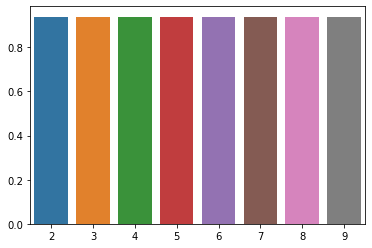

In [44]:
sns.barplot(x=keys, y= Acc)
plt.show()

Approx same

## 6. SVM

In [45]:
svc = SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10996
           1       0.96      0.92      0.94     10933

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929



In [46]:
Model.append("SVM ")
Accuracy.append(accuracy_score(y_test,y_pred))

Check different kernals ('linear', 'poly', 'rbf', 'sigmoid')

In [47]:
kernals = ['linear', 'poly', 'rbf', 'sigmoid']
Acc= []
for kernal in kernals:
    svc = SVC(kernel=kernal)
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    Acc.append(accuracy_score(y_test, y_pred))
    

In [48]:
Acc

[0.9403985589858178,
 0.9436818824387797,
 0.9433170687217839,
 0.9097086050435497]

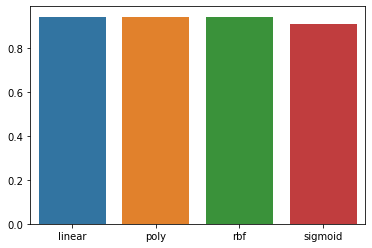

In [49]:
sns.barplot(x=kernals, y=Acc)
plt.show()

No much difference in Accuracy, but 'poly' give more than other kernals

# Performance metrics of all the above models 

In [50]:
pd.DataFrame([Model,Accuracy], index=['Model','Accuracy'])

,0,1,2,3,4,5
Model,Logistic Regression,AdaBoost,GaussianNB,BernoulliNB,KNN,SVM
Accuracy,0.94546,0.933923,0.789867,0.802818,0.938255,0.943682


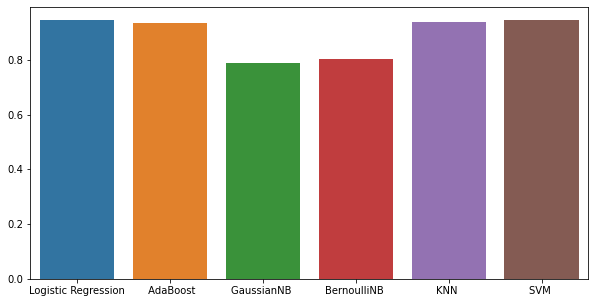

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=Model, y= Accuracy)
plt.show()

# Thankyou
